# Imports

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Tensor flow version:", tf.__version__)

Tensor flow version: 2.9.1


# Basic architecture of a NN

* Input layer: same as the number of samples
* Hidden layer: Unlimited, minumum 1
* Output layer: same as the number of desired outputs (number of classes, if regression, 1)

***there are more parameters, they will be covered in more detail latter***

**Regression problem, is simple words, is predicting a number, so lets get going! :)**

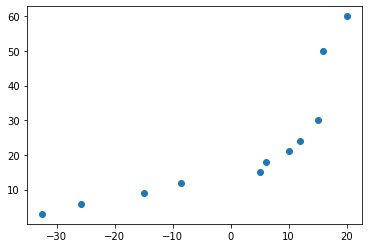

In [15]:
# Lets create some data to fit
X = np.array([-32.5, -25.8, -15, -8.6, 5, 6.1, 10, 12, 15, 16, 20])
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 30, 50, 60])

# Scater
plt.scatter(X, Y);

# Inputs and outputs shapes

In [18]:
# Input shape
X[0].shape

()

In [19]:
# Output shape
Y[0].shape

()

**But hold ON! If you try to train the model with this, you will encounter problems, bexause tensorflow 2.7+ requires the data to have at least 2 dimensions, in your case the data has 1 dimension mathematicaly speaking, and 0 ("tensorflowing" speaking)**

***lets fix the data dimensions***

In [21]:
X = tf.expand_dims(X, axis=-1)
Y = tf.expand_dims(Y, axis=-1)

**This is odd, but correct, because the input is a scalar, with has 0 dimensions in tensor flow, and the output as 0 dimensions too**

In [22]:
# Let"s build a model to fit this problem

# Step 1: Create a model: Define the layers (input, hidden, output, and maybe others)

# Set random seed
tf.random.set_seed(32)

# Model
model = tf.keras.Sequential([ # -> Sequential API make the layers in the coded order
    tf.keras.layers.Dense(1) # -> Just one layer by now (one output and one input)
])

# Step 2: Compile the model 
model.compile(
    loss=tf.keras.losses.mae, # Mean Absolute Error
    optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics=["mae"] # See how the model is going with this metric
)

## Define the loss function: The funciton that says how much the model is wrong;
## Define the optimizer: The funcitons that says how your model can improve;
## Dine eval metrics: The functions that can interpret the performance of your model;

# Step 3: Fitting the model: Letting the model find the relations
model.fit(X, Y, epochs=50) # -> How have 50 epochs to learn the patterns

Epoch 1/50
1/1 [==============================] - 1s 549ms/step - loss: 22.5141 - mae: 22.5141
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 22.5037 - mae: 22.5037
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 22.4933 - mae: 22.4933
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 22.4829 - mae: 22.4829
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 22.4725 - mae: 22.4725
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 22.4621 - mae: 22.4621
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 22.4517 - mae: 22.4517
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 22.4413 - mae: 22.4413
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 22.4309 - mae: 22.4309
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 22.4205 - mae: 22.4205
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - lo

In [23]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(11, 1), dtype=float64, numpy=
 array([[-32.5],
        [-25.8],
        [-15. ],
        [ -8.6],
        [  5. ],
        [  6.1],
        [ 10. ],
        [ 12. ],
        [ 15. ],
        [ 16. ],
        [ 20. ]])>,
 <tf.Tensor: shape=(11, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.],
        [30.],
        [50.],
        [60.]])>)

In [25]:
# Predict ussing the model
model.predict([12])

1/1 [==============================] - 0s 63ms/step


array([[3.5791779]], dtype=float32)

**Okay, your predictions are a shit, how to improve them?**

# Improving the model